# Module 00 — Electrical Fundamentals
## Voltage, Current, Resistance, Power — Ohm's Law & Kirchhoff's Laws

---

**What you'll learn:**
- What voltage, current, and resistance actually are
- Ohm's Law and how to use it
- Power dissipation in resistive circuits
- Kirchhoff's Voltage Law (KVL) and Current Law (KCL)
- Voltage dividers — the most important circuit you'll ever learn
- Current limiting resistors

**Equipment needed:** Klein MM300 multimeter, bench power supply (0–30V), breadboard, jumper wires, assorted resistors (330Ω, 1kΩ, 2.2kΩ, 4.7kΩ, 10kΩ).

In [2]:
# Setup — run this cell first
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.rcParams.update({
    'figure.figsize': (9, 5),
    'axes.grid': True,
    'font.size': 12,
    'lines.linewidth': 2,
})
print("Setup complete.")

Setup complete.


---
## 0. The Two Quantities You Need First: Energy and Charge

Before we define voltage, current, or anything else, we need two physical quantities that everything else is built from.

### Joules — the unit of energy

A **joule (J)** is the SI unit of energy. One joule is the energy needed to:
- Lift a 100g apple about 1 meter against gravity
- Light a 1W LED for 1 second
- Push 1 ampere of current through 1 ohm of resistance for 1 second

Energy is the capacity to do work — to move something, heat something, or emit light. In electronics, energy is what a battery stores and what components consume. A AA battery holds roughly 9,000 joules. A lightning bolt delivers about 1 billion joules.

The key insight: **energy is conserved.** It cannot be created or destroyed, only converted from one form to another. A battery converts chemical energy to electrical energy. A resistor converts electrical energy to heat. An LED converts it to light. This conservation principle is the physical foundation of Kirchhoff's Voltage Law (coming up in section 5).

### Coulombs — the unit of electric charge

**Charge** is a fundamental property of matter — as fundamental as mass. Just as mass creates gravitational attraction between objects, charge creates electrical attraction and repulsion. There are two kinds of charge, which we call **positive** and **negative** (arbitrary labels — Benjamin Franklin picked them before anyone knew what was going on inside atoms).

The key rule: **opposite charges attract, like charges repel.** This force is incredibly strong — roughly 10³⁶ times stronger than gravity at the atomic scale. It's the force that holds atoms together, holds molecules together, and (as we'll see) drives current through circuits.

In ordinary matter, positive and negative charges are balanced. Every atom has a positive nucleus (protons) surrounded by an equal number of negative electrons, so the atom is electrically neutral. A copper wire sitting on your desk has zero net charge — the protons and electrons cancel out perfectly.

So where does electricity come from if everything is balanced? **By separating charges.** When you pull electrons away from their atoms (or push them onto other atoms), you create a region with excess negative charge and a region with excess positive charge. Those separated charges desperately want to recombine — the attractive force between them is enormous — and that "wanting to recombine" is what drives current through a circuit.

A battery does exactly this: chemical reactions inside it pull electrons off atoms on one terminal and pile them up on the other. One terminal ends up with a surplus of electrons (negative, labeled −) and the other with a deficit (positive, labeled +). Connect a wire between the terminals and the electrons rush back to restore balance — that flow is electric current.

A **coulomb (C)** is the SI unit that measures *how much* charge you have. One coulomb is the charge of approximately 6.242 × 10¹⁸ electrons. That is a staggeringly large number of particles, which is why individual electrons rarely matter in circuit analysis — we always work with enormous crowds of them.

A single electron carries a charge of **−1.602 × 10⁻¹⁹ C** (negative by convention). Protons carry the same magnitude but positive. In a copper wire carrying 1 amp, roughly 6.2 quintillion electrons pass any point every second.

Charge is conserved — you cannot create or destroy it, only move it around. This conservation principle is the physical foundation of Kirchhoff's Current Law (section 6).

### How a coulomb carries energy

A coulomb is just a *count* of charges — it says nothing about how much energy those charges are carrying. The same coulomb of electrons can carry a little energy or a lot. What determines the energy is **how hard they've been pushed apart**, which is voltage.

Think of it with gravity: a kilogram of water is always a kilogram, whether it's sitting on the ground floor or on the roof of a skyscraper. But the kilogram on the roof has far more potential energy — it was *lifted* higher, and it can do more work when it falls. The mass didn't change; the height did.

Voltage is the electrical equivalent of that height. A coulomb of charge "lifted" to 12V carries 12 joules of energy. The same coulomb at 5V carries only 5 joules. The charge is identical — the same number of electrons — but the energy per charge is different because the source (battery, power supply) is doing a different amount of work to separate them.

This is exactly what the equation $V = W/Q$ says — where *W* is work (measured in joules) and *Q* is charge (measured in coulombs):
- A 12V battery does **12 joules of work** on every coulomb it pushes through the circuit
- A 5V USB supply does **5 joules of work** per coulomb
- A 1.5V AA battery does **1.5 joules of work** per coulomb

The battery is continuously doing this work — lifting each coulomb as it passes through — and the circuit is continuously spending it. Each charge gains energy as it passes through the battery and loses energy as it flows through components (dropping voltage across each one, converting electrical energy into heat, light, or motion). Both happen simultaneously, like a water pump and a water wheel running together. By the time a charge returns to the negative terminal, it has spent exactly the energy the battery put in (KVL: the voltage drops sum to zero around the loop).

> **A note on notation:** You'll see two kinds of letters in equations — *variable names* and *unit symbols*. They look similar but mean different things:
>
> | What we're measuring | Variable name (in equations) | Unit symbol (after numbers) |
> |---|---|---|
> | Energy / work | *W* | J (joules) |
> | Charge | *Q* | C (coulombs) |
> | Voltage | *V* | V (volts) |
> | Current | *I* | A (amperes) |
> | Time | *t* | s (seconds) |
>
> So $V = W / Q$ means "voltage equals work divided by charge," and the units are V = J / C (volts = joules per coulomb). The letter *W* in the equation is **not** watts — it stands for work, which is measured in joules. Confusingly, the *unit* for power is also W (watts), but that's a different context. You can always tell them apart: *W* in an equation is a variable (work/energy); W after a number (like "0.25 W") is a unit (watts).

### Why these matter

Every electrical quantity you will learn is defined in terms of joules and coulombs:

| Quantity | Definition | Equation | Unit |
|----------|-----------|----------|------|
| **Voltage** | Energy per unit charge | *V* = *W* / *Q* | V (volts) = J / C |
| **Current** | Charge flow per unit time | *I* = *Q* / *t* | A (amps) = C / s |
| **Power** | Energy per unit time | *P* = *W* / *t* | W (watts) = J / s |
| **Resistance** | Voltage per unit current | *R* = *V* / *I* | Ω (ohms) = V / A |

If you ever forget what a volt or an amp "really is," come back to this table. Voltage is how much energy each coulomb of charge carries. Current is how many coulombs pass per second. Power is how many joules are delivered per second. Everything else follows from these two building blocks.

---
## 1. Voltage — Electrical Potential Difference

### Concept

You'll hear the water analogy everywhere: voltage is like water pressure. It's a decent starting point — a higher reservoir creates more pressure at the tap, just as a higher voltage pushes harder on charges. But let's move past that quickly.

**Voltage is the energy per unit charge between two points.** Its unit is the **volt (V)**, which is one joule per coulomb:

$$V = \frac{W}{Q} \quad \text{(volts = joules / coulombs)}$$

(Remember from section 0: *W* here is the variable for work/energy in joules, *Q* is charge in coulombs.)

Key insight: **voltage is always measured between two points.** When someone says "this node is at 5V," they mean 5V *with respect to ground* (the reference point we call 0V). There is no such thing as the voltage at a single point in isolation.

### The Material Science Why

Inside a battery, chemical reactions continuously separate charges. This separation creates an **electric field** — and since we'll use this term a lot, let's unpack it.

**What is a field?** A field is a way of describing a force that acts across empty space — "action at a distance." Gravity is the most familiar example: the Earth creates a gravitational field that extends outward in all directions, getting weaker with distance. You can't see the field, but you know it's there because anything with mass placed within it feels a pull. You don't need a rope connecting the apple to the Earth — the field itself transmits the force.

An **electric field** works the same way, but for charge instead of mass. Any charged object creates an electric field that extends outward through the surrounding space. Place another charge in that field and it feels a force — attraction if the charges are opposite, repulsion if they're the same.

**Where does it exist?** The field exists in the space between and around the charges. In a circuit, that means it fills the wire, the air around the wire, and even the gaps between components. When a battery separates charges (piling up electrons on one terminal and leaving a deficit on the other), the resulting field extends through the wire connected to those terminals. It's this field — existing *inside the wire itself* — that pushes the free electrons along and creates current.

**How does it propagate?** When you flip a switch, the field doesn't crawl through the wire at electron-speed. Changes to the electric field propagate at close to the speed of light (~2/3 the speed of light in copper wire, specifically). That's why a light turns on instantly even though individual electrons barely move — the field establishes itself almost everywhere at once, and every free electron in the wire starts drifting simultaneously.

> **How deep does this go?** Pretty deep. The electric field is one half of the **electromagnetic field** — the other half is the magnetic field, and the two are intimately linked (changing one creates the other, which is how light works). The full description is Maxwell's equations, one of the most successful theories in all of physics. For circuit analysis, you don't need Maxwell's equations — thinking of the field as "the force that voltage exerts on charges through space" is sufficient and accurate. If you want to go deeper, Griffiths' *Introduction to Electrodynamics* is the standard reference.

The battery does work (spends chemical energy) to maintain the charge separation, which maintains the field. The voltage you read on the label is how much energy per coulomb the battery delivers to each charge passing through it.

---
## 2. Current — Charge in Motion

### Concept

**Current is the rate at which charge flows past a point.** Its unit is the **ampere (A)**, which is one coulomb per second:

$$I = \frac{Q}{t} \quad \text{(amps = coulombs / seconds)}$$

**Conventional current** flows from + to −. **Electron flow** goes the other way (− to +). We use conventional current in circuit analysis, and here's the story of why.

Benjamin Franklin, experimenting with static electricity in the 1740s, needed to pick a direction for current flow. He had no way to know what was physically moving inside a wire, so he guessed: he called the charge that seemed to flow from glass (rubbed with silk) "positive," and declared that current flows from + to −. He had a 50/50 shot. He got it backwards — 150 years later, J.J. Thomson discovered the electron and showed that in metals, it's the *negative* charges that actually move, in the opposite direction.

But here's the thing: **it doesn't matter for circuit analysis.** A positive charge moving left is electrically identical to a negative charge moving right — they produce the same current, the same magnetic field, the same voltage drops. The math works out the same either way. So the convention stuck. Every circuit diagram, every datasheet, every textbook uses conventional current (+ to −) unless explicitly stated otherwise.

And here's a twist that will matter for this course: Franklin's "wrong" convention turns out to be **half-right in semiconductors.** In silicon, there are two types of charge carriers — electrons (negative) and **holes** (effectively positive, moving in the conventional current direction). We'll meet holes in Module 02, but for now just know that conventional current isn't as arbitrary as it first seems. In semiconductors, positive carriers really do flow from + to −.

### The Material Science Why

In a copper wire, the outer-shell electrons of copper atoms are loosely bound and form a "sea" of free electrons. When you connect a battery, its electric field extends through the wire at close to the speed of light (as we saw in section 1). That field nudges every free electron in the wire simultaneously.

The electrons don't sprint — their **drift velocity** is only about 0.1 mm/s. But there are *so many* of them (~8.5 × 10²⁸ per m³ in copper) that even a tiny drift produces a large current. Think of it like a pipe completely filled with marbles: push one in at one end and one immediately pops out the other end. The signal (the field) travels at the speed of light; the individual electrons barely move.

> **Inside the battery itself**, it's a different story. The charge carriers aren't free electrons — they're **ions** (atoms that have gained or lost electrons) moving through a chemical electrolyte. And the positive ions actually *do* move in the conventional current direction, from + to −. So conventional current is only "backwards" in metals. In electrolytes, plasmas, and semiconductors, positive carriers are real.

---
## 3. Resistance and Ohm's Law

### Concept

**Resistance** is a material's opposition to current flow. Unit: **ohm (Ω)**.

**Ohm's Law** — the single most important equation in electronics:

$$V = I \cdot R$$

Rearranged:
- $I = V / R$ — more voltage or less resistance means more current
- $R = V / I$ — measure V and I to find R

**Worked example:** A 1kΩ resistor is connected across a 5V supply.  
$I = V / R = 5\text{V} / 1000\text{Ω} = 5\text{mA}$

### The Material Science Why

As charge carriers drift through a material, they collide with the lattice of atoms. Each collision transfers kinetic energy to the lattice (which is why resistors heat up). The more collisions per second, the higher the resistance.

In the copper wires and metal-film resistors on your breadboard, the charge carriers are **free electrons** — as we saw in section 2. But remember: electrons aren't the only kind of charge carrier. Inside a battery, the carriers are ions. In semiconductors, they're electrons *and* holes. What matters for resistance is not *which* carriers are moving, but **how many** there are and **how easily** they can move through the material.

This leads to a key difference between metals and semiconductors:
- **Metals:** plenty of free electrons, so resistance is low. Heating the metal makes the atomic lattice vibrate more, causing more collisions, so **resistance goes up** with temperature.
- **Semiconductors:** very few free carriers at room temperature, so resistance is high. But heating the material frees more carriers (knocks more electrons loose from the lattice), so **resistance goes down** with temperature — the extra carriers more than compensate for the extra vibration.

This distinction will matter enormously when we get to diodes and transistors. A semiconductor's resistance isn't fixed — it depends on temperature, doping (intentionally added impurities), and applied voltage. That's what makes semiconductors useful: their conductivity can be *controlled*.

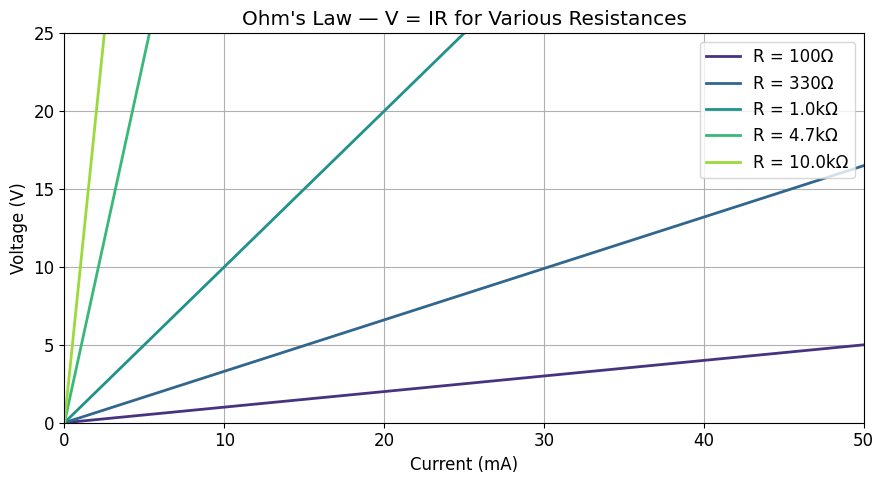

Steeper line = higher resistance.
The slope of each line IS the resistance (in V/A = Ω).


In [3]:
# --- Ohm's Law Visualization: V vs I for different resistances ---

I = np.linspace(0, 0.05, 200)  # 0 to 50 mA

resistances = [100, 330, 1000, 4700, 10000]
colors = plt.cm.viridis(np.linspace(0.15, 0.85, len(resistances)))

fig, ax = plt.subplots()
for R, color in zip(resistances, colors):
    V = I * R
    label = f"R = {R}Ω" if R < 1000 else f"R = {R/1000:.1f}kΩ"
    ax.plot(I * 1000, V, color=color, label=label)

ax.set_xlabel("Current (mA)")
ax.set_ylabel("Voltage (V)")
ax.set_title("Ohm's Law — V = IR for Various Resistances")
ax.legend()
ax.set_xlim(0, 50)
ax.set_ylim(0, 25)
plt.tight_layout()
plt.show()

print("Steeper line = higher resistance.")
print("The slope of each line IS the resistance (in V/A = Ω).")

---
## 4. Power Dissipation

### Concept

**Power** is the rate of energy transfer. Unit: **watt (W)**.

Three equivalent forms (all derived from Ohm's Law):

| Form | When to use |
|------|-------------|
| $P = I \cdot V$ | You know current and voltage |
| $P = I^2 \cdot R$ | You know current and resistance |
| $P = V^2 / R$ | You know voltage and resistance |

**Why resistors get hot:** All the electrical energy dissipated in a resistor converts to heat. A standard 1/4W through-hole resistor can handle 0.25W before it risks damage. Exceeding this is how you let the magic smoke out.

**Worked example:** 10V across a 100Ω resistor.  
$P = V^2 / R = 100 / 100 = 1\text{W}$  
A 1/4W resistor would burn up. You need at least a 1W (ideally 2W) resistor here.

### Datasheet Connection

Every resistor datasheet lists a **power rating** and a **derating curve** — above a certain temperature, the resistor can handle *less* power. When you choose a resistor, you must verify the power dissipation stays within rating. A good rule of thumb: **design for ≤ 50% of the rated power.**

In [ ]:
# --- Power dissipation vs current for a fixed resistor ---

R_val = 330  # 330 ohm resistor
I_range = np.linspace(0, 0.05, 300)  # 0 to 50 mA

P_watts = I_range**2 * R_val
P_mW = P_watts * 1000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Left plot: P vs I
ax1.plot(I_range * 1000, P_mW, color='#e74c3c')
ax1.axhline(y=250, color='gray', linestyle='--', label='1/4W rating (250 mW)')
ax1.fill_between(I_range * 1000, P_mW, 250, where=(P_mW > 250),
                  alpha=0.3, color='red', label='EXCEEDS RATING')
ax1.set_xlabel('Current (mA)')
ax1.set_ylabel('Power (mW)')
ax1.set_title(f'Power Dissipation in a {R_val}Ω Resistor (P = I²R)')
ax1.legend()
ax1.set_xlim(0, 50)

# Right plot: P vs V
V_range = np.linspace(0, 15, 300)
P_from_V = V_range**2 / R_val * 1000  # mW
ax2.plot(V_range, P_from_V, color='#2980b9')
ax2.axhline(y=250, color='gray', linestyle='--', label='1/4W rating (250 mW)')
ax2.fill_between(V_range, P_from_V, 250, where=(P_from_V > 250),
                  alpha=0.3, color='red', label='EXCEEDS RATING')
ax2.set_xlabel('Voltage across resistor (V)')
ax2.set_ylabel('Power (mW)')
ax2.set_title(f'Power Dissipation in a {R_val}Ω Resistor (P = V²/R)')
ax2.legend()
ax2.set_xlim(0, 15)

plt.tight_layout()
plt.show()

# Calculate max safe current and voltage for 1/4W
I_max = np.sqrt(0.25 / R_val)
V_max = np.sqrt(0.25 * R_val)
print(f"For a {R_val}Ω, 1/4W resistor:")
print(f"  Max safe current: {I_max*1000:.1f} mA")
print(f"  Max safe voltage: {V_max:.1f} V")

---
## 5. Kirchhoff's Voltage Law (KVL)

### Concept

**The sum of all voltages around any closed loop in a circuit equals zero.**

$$\sum V_{\text{loop}} = 0$$

This is conservation of energy: a charge that travels around a complete loop returns to the same potential it started at. Whatever energy the source puts in, the components take out.

**Example — Series resistors:**

```
    +---[ R1=1kΩ ]---+---[ R2=2.2kΩ ]---+
    |                                     |
   (+)  V_supply = 5V                    |
    |                                     |
    +----------------GND------------------+
```

Total resistance: $R_T = 1000 + 2200 = 3200\text{Ω}$  
Current: $I = 5 / 3200 = 1.5625\text{mA}$  
Voltage across R1: $V_1 = 1.5625\text{mA} \times 1000\text{Ω} = 1.5625\text{V}$  
Voltage across R2: $V_2 = 1.5625\text{mA} \times 2200\text{Ω} = 3.4375\text{V}$  

**KVL check:** $+5\text{V} - 1.5625\text{V} - 3.4375\text{V} = 0$ ✓

In [ ]:
# --- KVL Demonstration: Series circuit ---

V_supply = 5.0  # volts
R1 = 1000       # ohms
R2 = 2200       # ohms

R_total = R1 + R2
I = V_supply / R_total

V_R1 = I * R1
V_R2 = I * R2

print("=== Series Circuit — KVL Verification ===")
print(f"Supply voltage:     {V_supply:.4f} V")
print(f"R1 = {R1}Ω,  R2 = {R2}Ω")
print(f"Total resistance:   {R_total} Ω")
print(f"Current:            {I*1000:.4f} mA")
print(f"Voltage across R1:  {V_R1:.4f} V")
print(f"Voltage across R2:  {V_R2:.4f} V")
print(f"")
print(f"KVL check: V_supply - V_R1 - V_R2 = {V_supply - V_R1 - V_R2:.6f} V  (should be 0)")

# Visual bar chart
fig, ax = plt.subplots(figsize=(7, 4))
bars = ax.bar(['V_supply', 'V_R1', 'V_R2'], [V_supply, V_R1, V_R2],
              color=['#27ae60', '#e74c3c', '#e67e22'], edgecolor='black')
ax.set_ylabel('Voltage (V)')
ax.set_title('KVL: Supply voltage is split across R1 and R2')
for bar, val in zip(bars, [V_supply, V_R1, V_R2]):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            f'{val:.3f}V', ha='center', fontweight='bold')
ax.set_ylim(0, 6)
plt.tight_layout()
plt.show()

---
## 6. Kirchhoff's Current Law (KCL)

### Concept

**The sum of all currents entering a node equals the sum of all currents leaving it.**

$$\sum I_{\text{in}} = \sum I_{\text{out}}$$

Or equivalently: the algebraic sum of all currents at a node is zero.

This is conservation of charge: charge doesn't accumulate at a node (in steady-state DC circuits). Whatever flows in must flow out.

**Example — Parallel resistors:**

```
        +-----+-----+
        |     |     |
       (+)   [R1]  [R2]
      5V     1kΩ  2.2kΩ
        |     |     |
        +--GND+-----+
```

$I_1 = 5\text{V} / 1000\text{Ω} = 5.0\text{mA}$  
$I_2 = 5\text{V} / 2200\text{Ω} = 2.27\text{mA}$  
$I_{\text{total}} = I_1 + I_2 = 7.27\text{mA}$

**KCL check at the top node:** $I_{\text{supply}} = I_1 + I_2$ ✓

### The Material Science Why

Charge is conserved — it is a fundamental law of physics. If current could "disappear" at a node, we'd be destroying electrons, which would violate conservation of charge and release enormous energy (pair annihilation). In a circuit, every electron that arrives at a junction must leave through one of the connected paths.

In [ ]:
# --- KCL Demonstration: Parallel circuit ---

V_supply = 5.0
R1 = 1000
R2 = 2200

I1 = V_supply / R1
I2 = V_supply / R2
I_total = I1 + I2

# Equivalent parallel resistance
R_parallel = 1 / (1/R1 + 1/R2)

print("=== Parallel Circuit — KCL Verification ===")
print(f"Supply: {V_supply}V")
print(f"R1 = {R1}Ω → I1 = {I1*1000:.2f} mA")
print(f"R2 = {R2}Ω → I2 = {I2*1000:.2f} mA")
print(f"I_total = I1 + I2 = {I_total*1000:.2f} mA")
print(f"")
print(f"Equivalent parallel resistance: {R_parallel:.1f} Ω")
print(f"Check via Ohm's Law: I = V/R_par = {V_supply/R_parallel*1000:.2f} mA ✓")

# Pie chart of current distribution
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([I1, I2], labels=[f'Through R1 ({R1}Ω)\n{I1*1000:.2f} mA',
                          f'Through R2 ({R2}Ω)\n{I2*1000:.2f} mA'],
        colors=['#3498db', '#e67e22'], autopct='%.1f%%',
        startangle=90, textprops={'fontsize': 12})
ax.set_title(f'KCL: Current splits at a node\nTotal: {I_total*1000:.2f} mA')
plt.tight_layout()
plt.show()

---
## 7. Voltage Dividers — The Most Important Circuit You'll Learn

### Concept

A voltage divider is two resistors in series. The voltage at the midpoint is a fraction of the input voltage:

$$V_{\text{out}} = V_{\text{in}} \cdot \frac{R_2}{R_1 + R_2}$$

```
    V_in ----[ R1 ]----+---- V_out
                       |
                      [ R2 ]
                       |
                      GND
```

**Why this matters:** Voltage dividers show up *everywhere*:
- Biasing transistors
- Setting reference voltages
- Reading sensors (thermistors, photoresistors, etc.)
- Feedback networks in op-amps and voltage regulators
- ADC input scaling

**Critical caveat:** The formula above only works when the load connected to V_out draws negligible current. If you connect a low-impedance load, it acts as a resistor in parallel with R2, and the output voltage drops. This is the #1 mistake beginners make with voltage dividers.

### Datasheet Connection

Many voltage regulators (like the LM317) use a voltage divider on the output to set the regulated voltage. The datasheet gives you the formula and tells you which resistor values to use. Potentiometers are also variable voltage dividers — their datasheets specify total resistance and taper (linear vs logarithmic).

In [ ]:
# --- Voltage Divider Calculator and Visualization ---

def voltage_divider(V_in, R1, R2, R_load=None):
    """Calculate voltage divider output, optionally with a load."""
    if R_load is not None:
        # R2 in parallel with R_load
        R2_effective = (R2 * R_load) / (R2 + R_load)
    else:
        R2_effective = R2
    V_out = V_in * R2_effective / (R1 + R2_effective)
    return V_out

# Example calculations
V_in = 12.0
R1 = 10000   # 10kΩ
R2 = 4700    # 4.7kΩ

V_out_no_load = voltage_divider(V_in, R1, R2)
V_out_10k = voltage_divider(V_in, R1, R2, R_load=10000)
V_out_1k = voltage_divider(V_in, R1, R2, R_load=1000)

print(f"Voltage Divider: V_in = {V_in}V, R1 = {R1/1000:.1f}kΩ, R2 = {R2/1000:.1f}kΩ")
print(f"  No load:          V_out = {V_out_no_load:.3f} V")
print(f"  10kΩ load:        V_out = {V_out_10k:.3f} V  (loaded down!)")
print(f"  1kΩ load:         V_out = {V_out_1k:.3f} V   (severely loaded!)")
print()
print("Lesson: Keep your load impedance >> R2 (at least 10x), or the divider fails.")

# Plot: Vout vs R2 for fixed R1 and Vin
R2_range = np.linspace(100, 100000, 500)
V_out_range = V_in * R2_range / (R1 + R2_range)

fig, ax = plt.subplots()
ax.plot(R2_range / 1000, V_out_range, color='#2c3e50')
ax.axhline(y=V_in, color='gray', linestyle=':', alpha=0.5, label=f'V_in = {V_in}V')
ax.axhline(y=V_in/2, color='gray', linestyle='--', alpha=0.5, label=f'V_in/2 = {V_in/2}V')
ax.axvline(x=R1/1000, color='red', linestyle='--', alpha=0.5, label=f'R2 = R1 → V_out = V_in/2')
ax.set_xlabel('R2 (kΩ)')
ax.set_ylabel('V_out (V)')
ax.set_title(f'Voltage Divider Output vs R2  (R1 = {R1/1000:.0f}kΩ, V_in = {V_in}V)')
ax.legend()
ax.set_xlim(0, 100)
ax.set_ylim(0, V_in + 0.5)
plt.tight_layout()
plt.show()

In [ ]:
# --- Interactive Voltage Divider (uses ipywidgets) ---
try:
    from ipywidgets import interact, FloatSlider, IntSlider
    
    def plot_divider(V_in=5.0, R1_kohm=10.0, R2_kohm=4.7):
        R1 = R1_kohm * 1000
        R2 = R2_kohm * 1000
        V_out = V_in * R2 / (R1 + R2)
        I = V_in / (R1 + R2)
        P_total = V_in * I
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        # Bar chart of voltages
        V_R1 = I * R1
        ax1.bar(['V_R1', 'V_out (V_R2)'], [V_R1, V_out],
                color=['#e74c3c', '#27ae60'], edgecolor='black')
        ax1.set_ylabel('Voltage (V)')
        ax1.set_title(f'V_out = {V_out:.3f}V  (from {V_in}V input)')
        ax1.set_ylim(0, max(V_in * 1.1, 1))
        ax1.axhline(y=V_in, color='blue', linestyle='--', alpha=0.5, label=f'V_in = {V_in}V')
        ax1.legend()
        
        # Circuit info
        info = (f"R1 = {R1_kohm}kΩ\nR2 = {R2_kohm}kΩ\n"
                f"V_out = {V_out:.3f}V\nI = {I*1000:.3f} mA\n"
                f"P_total = {P_total*1000:.2f} mW")
        ax2.text(0.5, 0.5, info, transform=ax2.transAxes,
                fontsize=14, verticalalignment='center', horizontalalignment='center',
                fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
        ax2.set_axis_off()
        ax2.set_title('Circuit Parameters')
        
        plt.tight_layout()
        plt.show()
    
    interact(plot_divider,
             V_in=FloatSlider(min=1, max=30, step=0.5, value=5.0, description='V_in (V)'),
             R1_kohm=FloatSlider(min=0.1, max=100, step=0.1, value=10.0, description='R1 (kΩ)'),
             R2_kohm=FloatSlider(min=0.1, max=100, step=0.1, value=4.7, description='R2 (kΩ)'))
except ImportError:
    print("ipywidgets not available. Install with: pip install ipywidgets")
    print("Falling back to static example.")
    print(f"\nV_in=5V, R1=10kΩ, R2=4.7kΩ → V_out = {5*4700/(10000+4700):.3f}V")

---
## 8. Current Limiting Resistors

### Concept

A current limiting resistor restricts the maximum current that can flow through a component — most commonly an LED.

**LED example:** A typical red LED has a forward voltage of ~2V and a maximum continuous current of 20mA. With a 5V supply:

$$R = \frac{V_{\text{supply}} - V_{\text{LED}}}{I_{\text{LED}}} = \frac{5 - 2}{0.020} = 150\Omega$$

```
    5V ---[ 150Ω ]---[>|]--- GND
                      LED
```

In practice you'd use 220Ω or 330Ω for a comfortable margin and slightly dimmer (but longer-lasting) LED.

**Why not just connect the LED directly?** Without the resistor, the LED's low forward resistance means near-infinite current flows — the LED dies instantly. The resistor absorbs the excess voltage and limits current to a safe value.

### Datasheet Connection

LED datasheets specify:
- **Forward voltage (V_f):** typically 1.8–3.3V depending on color
- **Maximum forward current (I_f):** typically 20mA for standard LEDs
- **Absolute maximum ratings:** exceed these and the part is destroyed

In [ ]:
# --- Current Limiting Resistor Calculator ---

def calc_led_resistor(V_supply, V_led, I_led_mA):
    I_led = I_led_mA / 1000
    R = (V_supply - V_led) / I_led
    P_resistor = I_led**2 * R * 1000  # mW
    P_led = V_led * I_led * 1000       # mW
    return R, P_resistor, P_led

# Common LED colors
leds = [
    ('Red',    1.8, '#e74c3c'),
    ('Yellow', 2.0, '#f1c40f'),
    ('Green',  2.1, '#27ae60'),
    ('Blue',   3.0, '#3498db'),
    ('White',  3.2, '#ecf0f1'),
]

V_supply = 5.0
I_target_mA = 15  # conservative target

print(f"Current Limiting Resistors for V_supply = {V_supply}V, I_target = {I_target_mA}mA")
print(f"{'Color':<8} {'V_f':>5} {'R_calc':>8} {'R_std':>8} {'P_resistor':>10} {'P_LED':>8}")
print("-" * 55)

# Standard resistor values (E12 series, common)
std_values = [10, 12, 15, 18, 22, 27, 33, 39, 47, 56, 68, 82,
              100, 120, 150, 180, 220, 270, 330, 390, 470, 560, 680, 820,
              1000, 1200, 1500, 1800, 2200]

for name, vf, color in leds:
    R, P_r, P_l = calc_led_resistor(V_supply, vf, I_target_mA)
    # Find nearest standard value (round up for safety)
    R_std = min([v for v in std_values if v >= R], default=R)
    print(f"{name:<8} {vf:>4.1f}V {R:>7.0f}Ω {R_std:>7.0f}Ω {P_r:>8.1f} mW {P_l:>7.1f} mW")

print("\nAll power values well within 1/4W (250mW) rating.")

---
## 9. Simulation

Explore these circuits interactively in Falstad:

- **Ohm's Law / Series resistors:** [Falstad — Series Resistors](https://www.falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgoqoQFMBaMMAKABcQUUAWKvPHj0KDuAJxA9CYZJmRhEYAGYBDAK4AbAC5yw3VRAzLMq0hux7uMMHuSJzIPhAlheyFGdceAfLwm+UOjhJfANQxyQXNw8ILyjCBEJkKJAEgnDCRyA)
- **Voltage Divider:** [Falstad — Voltage Divider](https://www.falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgoqoQFMBaMMAKAHcQUUAWEPPXoUE8ATiBSEwyTMjCIwAMwCGAVwA2AFzlgeqiJuWZVpDdj3cYYPckRmQfSBLDdkyc6-cA+HhN8octHh4kgYGQA)
- **Parallel resistors (KCL):** [Falstad — Parallel Resistors](https://www.falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgoqoQFMBaMMAKABcRiUAWKq7jz6FBPDgCcQIkCkJgUmZGERgAZgEMAri3YBnOWB5qIm5VvWkN2Y91hh9yROZC9IEsD3TJzbjwD5eEj5SOHRS+AZ6YAiGAO5YZqZAA)

In Falstad, hover over any wire to see voltage and current. Right-click components to change values and see how the circuit responds.

---
## 10. Experiments

### Experiment 1: Measure Resistance with the Multimeter

**Goal:** Verify resistor values and build confidence with your Klein MM300.

1. Set the Klein MM300 to the Ω (resistance) mode.
2. Pick any resistor from your kit. Read the color bands and predict the value.
3. Touch the probes to each lead of the resistor. Record the reading.
4. Repeat for 4-5 different resistors.

**Expected:** Readings should be within the resistor's tolerance (typically ±5% for gold band, ±1% for brown band). A 1kΩ ±5% resistor can read anywhere from 950Ω to 1050Ω.

---

### Experiment 2: Build a Voltage Divider

**Goal:** Build a voltage divider and verify V_out matches the formula.

**Circuit:**
```
Bench Supply (+5V) ----[ 10kΩ ]----+---- Measure V_out here
                                    |
                                  [ 4.7kΩ ]
                                    |
Bench Supply (GND) ----------------+
```

**Steps:**
1. Set bench supply to 5.00V (verify with multimeter).
2. Insert R1 (10kΩ) and R2 (4.7kΩ) into breadboard in series.
3. Connect bench supply + to one end of R1, GND to one end of R2.
4. Set multimeter to DC Voltage mode.
5. Measure V_out at the junction of R1 and R2 (red probe) to GND (black probe).

**Expected:** $V_{out} = 5.0 \times 4700 / (10000 + 4700) = 1.599\text{V}$  
Your reading should be close to 1.6V (within a few percent, depending on resistor tolerance).

---

### Experiment 3: Verify KVL Around a Loop

**Goal:** Measure individual voltage drops and confirm they sum to the supply voltage.

**Circuit:**
```
Bench Supply (+5V) ---[ 1kΩ ]---[ 2.2kΩ ]---[ 4.7kΩ ]--- Bench Supply (GND)
                       ↑ V1        ↑ V2         ↑ V3
```

**Steps:**
1. Wire three resistors in series on the breadboard.
2. Measure the voltage across each resistor individually with the multimeter.
3. Record V1, V2, V3.
4. Verify: V1 + V2 + V3 ≈ 5.0V

**Expected values:**

In [ ]:
# --- Expected values for Experiment 3 ---
V_s = 5.0
R_vals = [1000, 2200, 4700]
R_total = sum(R_vals)
I = V_s / R_total

print(f"Supply: {V_s}V")
print(f"Total resistance: {R_total}Ω")
print(f"Current: {I*1000:.3f} mA")
print()
V_sum = 0
for i, R in enumerate(R_vals):
    V = I * R
    V_sum += V
    print(f"  V across {R}Ω: {V:.3f} V")
print(f"\nSum of drops: {V_sum:.3f} V (should equal {V_s}V)")

### Experiment 4: Measure Current in a Series Circuit

**Goal:** Use the multimeter in current mode and verify Ohm's Law.

**Circuit:**
```
Bench Supply (+5V) ---[ 1kΩ ]---+
                                 |
                          [Multimeter in
                           CURRENT mode]
                                 |
Bench Supply (GND) -------------+
```

**Steps:**
1. **IMPORTANT:** Move the red probe to the **mA/A** jack on the Klein MM300. Set the dial to DC mA.
2. Wire the multimeter IN SERIES with the resistor (the current must flow *through* the meter).
3. Apply 5V from the bench supply.
4. Read the current.

**Expected:** $I = 5\text{V} / 1000\text{Ω} = 5.0\text{mA}$

**Common mistake:** Connecting the multimeter in **parallel** while in current mode. This creates a near-short-circuit through the meter's low internal resistance and can blow the meter's fuse. Always double-check your connections before applying power.

---
## 11. Putting It All Together: Series-Parallel Circuit Analysis

Let's analyze a circuit that combines everything we've learned.

In [ ]:
# --- Complete circuit analysis: Series-Parallel ---
#
#  V_in = 12V
#    |                          
#   [R1 = 1kΩ]                  
#    |                          
#    +---[R2 = 2.2kΩ]---+      
#    |                   |      
#    +---[R3 = 4.7kΩ]---+      
#    |                          
#   GND                         
#
# R2 and R3 are in parallel, that combination is in series with R1.

V_in = 12.0
R1 = 1000
R2 = 2200
R3 = 4700

# Step 1: Combine R2 || R3
R23 = (R2 * R3) / (R2 + R3)
print(f"Step 1: R2 || R3 = ({R2} × {R3}) / ({R2} + {R3}) = {R23:.1f} Ω")

# Step 2: Total resistance
R_total = R1 + R23
print(f"Step 2: R_total = R1 + R23 = {R1} + {R23:.1f} = {R_total:.1f} Ω")

# Step 3: Total current (through R1)
I_total = V_in / R_total
print(f"Step 3: I_total = V_in / R_total = {V_in} / {R_total:.1f} = {I_total*1000:.3f} mA")

# Step 4: Voltage drops
V_R1 = I_total * R1
V_R23 = I_total * R23  # = voltage across R2 = voltage across R3
print(f"Step 4: V_R1 = {V_R1:.3f} V")
print(f"         V_R2 = V_R3 = {V_R23:.3f} V")

# Step 5: Branch currents (KCL)
I_R2 = V_R23 / R2
I_R3 = V_R23 / R3
print(f"Step 5: I_R2 = {I_R2*1000:.3f} mA")
print(f"         I_R3 = {I_R3*1000:.3f} mA")
print(f"         I_R2 + I_R3 = {(I_R2+I_R3)*1000:.3f} mA  (should equal I_total = {I_total*1000:.3f} mA)")

# Step 6: KVL check
print(f"\nKVL check: V_in - V_R1 - V_R23 = {V_in - V_R1 - V_R23:.6f} V ✓")

# Step 7: Power
P_R1 = I_total**2 * R1
P_R2 = I_R2**2 * R2
P_R3 = I_R3**2 * R3
P_total = V_in * I_total
print(f"\nPower dissipation:")
print(f"  R1: {P_R1*1000:.2f} mW")
print(f"  R2: {P_R2*1000:.2f} mW")
print(f"  R3: {P_R3*1000:.2f} mW")
print(f"  Total from supply: {P_total*1000:.2f} mW")
print(f"  Sum of components: {(P_R1+P_R2+P_R3)*1000:.2f} mW ✓")

---
## Checkpoint Questions

Test your understanding. Try to answer before revealing the solutions.

**Q1:** A 470Ω resistor has 9.4V across it. What is the current through it? What power is it dissipating? Is a 1/4W resistor sufficient?

**Q2:** You have a 12V supply and need 3.3V for a microcontroller. Design a voltage divider using standard resistor values. What values would you pick? (Hint: use the E12 series.)

**Q3:** In a parallel circuit with R1 = 1kΩ and R2 = 1kΩ connected to 5V, what is the total current drawn from the supply? What is the equivalent resistance?

**Q4:** You need to drive a blue LED (V_f = 3.0V, I_f = 20mA max) from a 3.3V supply. Calculate the resistor needed. What's the problem with this situation?

**Q5:** A series circuit has three resistors: 100Ω, 220Ω, and 330Ω, connected to a 9V battery. Using KVL, find the voltage across the 220Ω resistor.

In [ ]:
# --- Checkpoint Answers (run to reveal) ---

print("=" * 60)
print("CHECKPOINT ANSWERS")
print("=" * 60)

# Q1
I_q1 = 9.4 / 470
P_q1 = 9.4 * I_q1
print(f"\nQ1: I = 9.4V / 470Ω = {I_q1*1000:.1f} mA")
print(f"    P = 9.4V × {I_q1*1000:.1f}mA = {P_q1*1000:.1f} mW")
print(f"    {P_q1*1000:.1f} mW < 250 mW → Yes, 1/4W is sufficient.")

# Q2
print(f"\nQ2: Need V_out = 3.3V from 12V.")
print(f"    V_out/V_in = 3.3/12 = {3.3/12:.4f}")
print(f"    Using R2=3.3kΩ, R1 = R2×(V_in/V_out - 1) = 3300×{12/3.3-1:.3f} = {3300*(12/3.3-1):.0f}Ω")
print(f"    Nearest standard: R1=8.2kΩ, R2=3.3kΩ")
print(f"    Actual V_out = 12 × 3300/(8200+3300) = {12*3300/(8200+3300):.3f}V")
print(f"    Close enough for many applications. For precision, use a voltage regulator.")

# Q3
print(f"\nQ3: R_eq = (1000×1000)/(1000+1000) = 500Ω")
print(f"    I_total = 5V / 500Ω = 10 mA")
print(f"    (5mA through each branch)")

# Q4
print(f"\nQ4: R = (3.3 - 3.0) / 0.020 = {0.3/0.020:.0f}Ω")
print(f"    Problem: Only 0.3V headroom! Slight variations in V_f or V_supply")
print(f"    will cause massive current swings. This is a poor design.")
print(f"    Better: Use a 5V supply, or a constant-current LED driver.")

# Q5
R_total_q5 = 100 + 220 + 330
I_q5 = 9 / R_total_q5
V_220 = I_q5 * 220
print(f"\nQ5: R_total = {R_total_q5}Ω, I = 9/{R_total_q5} = {I_q5*1000:.3f} mA")
print(f"    V across 220Ω = {I_q5*1000:.3f}mA × 220Ω = {V_220:.3f}V")

---

## Summary

| Concept | Key Equation | Unit |
|---------|-------------|------|
| Voltage | *V* = *W* / *Q* (work per charge) | V (volts) = J / C |
| Current | *I* = *Q* / *t* (charge per time) | A (amps) = C / s |
| Resistance | *R* = *V* / *I* | Ω (ohms) = V / A |
| Power | *P* = *I* · *V* = *I*²*R* = *V*²/*R* | W (watts) = J / s |
| KVL | $\sum V_{loop} = 0$ | — |
| KCL | $\sum I_{node} = 0$ | — |
| Voltage divider | $V_{out} = V_{in} \cdot R_2/(R_1+R_2)$ | — |
| Series resistance | $R_T = R_1 + R_2 + \ldots$ | Ω |
| Parallel resistance | $1/R_T = 1/R_1 + 1/R_2 + \ldots$ | Ω |

**Next up:** AC vs DC and Signals — we'll use the oscilloscope and signal generator for the first time.